<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/caminata_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Caminata aleatoria 1D

En una notebook de Jupyter, escribir un código que implemente una caminata aleatoria 1D, con probabilidad p de moverse a la derecha y probabilidad q de moverse a la izquierda, tal que p + q = 1.
La notebook debe incluir explicación con ecuaciones en LaTex.
El código debe graficar las trayectorias y permitir elegir valores para p.

Se califica:
* Presentación.
* Completez.
* Funcionamiento.
* Incluir una sección final de análisis y conclusiones.

El uso indiscriminado de IA será motivo de cancelación de la tarea.

Entregar esta tarea en github: poner solamente el link al repositorio correspondiente. No se aceptan archivos ni enlaces a Drive.



In [ ]:
import random
import matplotlib.pyplot as plt

Definimos a:

* $p$ es la probabilidad que se encuentra entre (0,1)
* $N$ son los número de pasos ue daremos

In [ ]:
p=0.5
N=100

In [ ]:
def caminata(p,N):
  x=0
  posiciones=
  for _ in range(N):
    if random.random()<p:
      x=x+1

    else:
        x=x-1
  return x

In [ ]:
#imprmir una lista de varios resultados
L= []
for i in range(N):

  L.append(caminata(0.5,110))

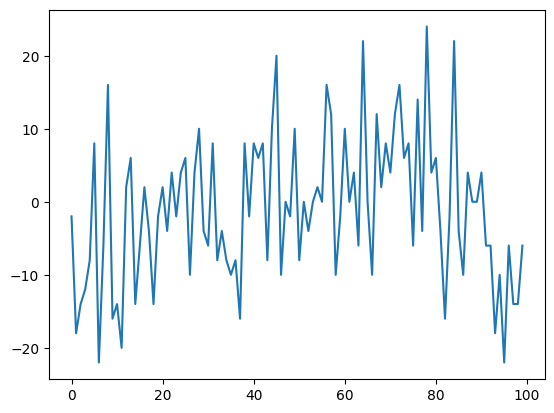

In [ ]:
plt.plot(L)

CUAL FUE EL MÁXIMO ALEJAMIENTO, UTILIZANDO EL VALOR ABSOLUTO
